# Carbon Emission Prediction Using Machine Learing

Carbon emission is said to be one of the most critical reasons of global warming. This project aims to provide a country-wise overview of the future trends of carbon emission as well as a global trend prediction for next ten years. The approach is to analyse the historical data for these countries various economic factors, learn them, and make future predictions.

Dataset:
https://www.kaggle.com/manchunhui/world-co2-emissions-analysis/

# Summary

Algorithm selection is one of the vital parts of machine learning after data cleaning and preprocessing. Since it is a supervised learning and this problem required prediction of continues value, regression algorithms are the way to follow. There are several regression algorithms out there. In this notebook as part of the model selection process four different algorithms have been trained and tested, and finally the best algorithm has been selected to tune and take forward. 

The accounted algorithms are:
* Linear Regression
* Decision Tree Regression
* Random Forest Regression
* Support Vector Machine

# Alogorithm Selection

## Import libraries and read dataset

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset into dataframe
data = pd.read_csv('../dataset/processed/data_preprocessed.csv')

In [3]:
# Check the dataframe shape
data.shape

(7040, 25)

In [6]:
# Check summary of dataframe
data.head()

,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,0.0,1971.0,179.560502,1.351166,805.7,0.564548,3410.310,82.814638,0.0,81.536388,...,15.834196,3.008041,3.897323,2133.368871,14500.0,15844.224,2.521468,8.088198,6.935496,15.632
1,0.0,1972.0,179.560502,1.410646,780.3,0.721246,4506.743,77.328549,0.0,81.145585,...,21.260806,4.912853,3.897323,2133.368871,15590.0,16758.848,3.381711,8.226706,8.512645,16.455
2,0.0,1973.0,179.560502,1.694730,764.0,0.751240,4880.777,78.198305,0.0,82.723577,...,20.106941,5.225642,3.897323,2133.368871,16651.7,17638.938,3.898493,8.323290,8.964003,17.310
3,0.0,1974.0,179.560502,1.748593,712.6,0.720776,4873.443,77.325302,0.0,69.812856,...,20.926104,4.493266,3.897323,2133.368871,15008.3,14997.738,3.989233,8.413978,9.013923,18.202
4,0.0,1975.0,179.560502,1.982570,773.9,0.628569,4415.068,80.191191,0.0,72.796935,...,17.826264,11.942561,3.897323,2133.368871,17061.4,17645.913,3.810585,8.520843,8.772812,19.128


## Features and label selection 

In [7]:
# Pick features from the dataframe dropping the label column
X = data.drop('CO2_EM_PC', axis=1)
# Pick label from the dataframe
y = data['CO2_EM_PC']

## Splitting training and test set

In [8]:
# Splitting of traing testing set into X and y
# Take 40% data for testing subset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Feature scaling

It is important to scale the features for optimal predictions for all the algorithms except the random forest regression. The scaling helps model getting fitted correct feature values event though the weight of the feature values may or may not be the same. 

In [9]:
# Define scalater from sklearn library
scaler = StandardScaler()
# Scale features and label
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Algorithms

## Linear Regression

In [10]:
# Define model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# View model intercept
model.intercept_

4.683442041468609

In [12]:
# View model co-efficient
model.coef_

array([ 2.80980523e-01, -3.31752353e-01, -5.21775176e-02, -8.00497886e-01,
        4.16870505e-01,  5.96584795e-01,  1.27663706e+00, -1.16764280e+00,
       -1.32174863e+00, -9.64940562e-01, -3.71204120e-01, -1.38850907e+00,
       -4.17247058e-01,  4.16258633e+00,  1.71417480e+00, -7.59737179e-04,
       -1.11849402e-02, -6.18471853e-02, -2.45845154e-01, -1.02078133e-01,
        1.69595654e-01,  5.01297045e-02, -1.85779898e-01,  8.72509512e-01])

In [13]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([ 3.38426293, 23.94935321, 10.62699117, ...,  1.35790406,
        8.67727694, -0.24360457])

In [14]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

2.175468538597582

In [15]:
# R2 score
r2_score(y_test, y_pred)

0.8352645586452483

In [16]:
# Frame predicted values
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [17]:
# Generate line from real and predicted values
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))
# Show comparison
lin_pred

,pred_values,real_values
0,3.38,1.480830
1,23.95,26.146800
2,10.63,11.951632
3,-0.00,0.138630
4,4.59,4.377988
...,...,...
2811,0.31,0.522618
2812,20.55,27.431434
2813,1.36,1.232285
2814,8.68,9.340093


In [18]:
# Error margin
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])
print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  1.2499109116014042


<AxesSubplot:xlabel='CO2_EM_PC', ylabel='Count'>

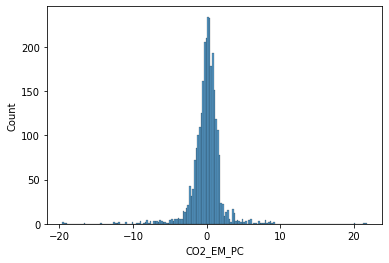

In [19]:
# Plot test data with predicted data
sns.histplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

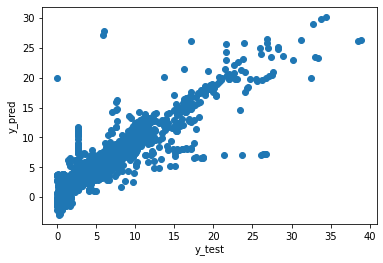

In [20]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

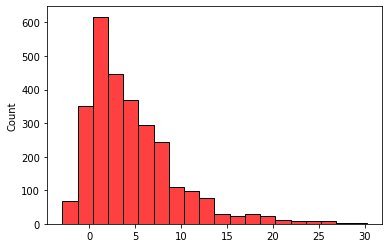

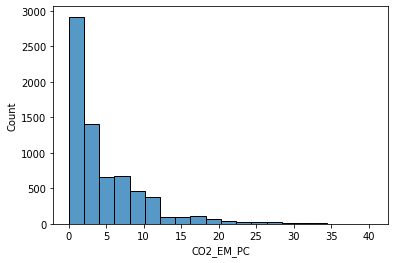

In [21]:
sns.histplot(y_pred, bins=20,color='red')
plt.show()
sns.histplot(data['CO2_EM_PC'], bins=20)
plt.show()

## Decision Tree Regression

In [22]:
# Import decision tree regression algorithm from Sklearn
from sklearn.tree import DecisionTreeRegressor
# Train the model
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Make predictions
dtr_pred = model.predict(X_test)
dtr_pred

array([ 1.6674123 , 24.30514892,  6.08224227, ...,  1.25614581,
        8.83664294,  0.0800615 ])

In [24]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test,dtr_pred ))

1.0766627592488185

In [25]:
# R2 score
r2_score(y_test, dtr_pred)

0.959650253290528

In [26]:
# Generate frame from test values and predicted values
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,1.667412,1.480830
1,24.305149,26.146800
2,6.082242,11.951632
3,0.135983,0.138630
4,4.911682,4.377988


In [27]:
# View error margin
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))
dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])
print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  0.3782295130589391


In [28]:
# View actual and predicted value difference
dtr_pred.head(10)

,pred_values,real_values,diff
0,1.67,1.480830,0.189170
1,24.31,26.146800,1.836800
2,6.08,11.951632,5.871632
3,0.14,0.138630,0.001370
4,4.91,4.377988,0.532012
5,0.84,0.895302,0.055302
6,0.30,0.326343,0.026343
7,7.64,7.627070,0.012930
8,2.17,2.184579,0.014579
9,0.60,0.757221,0.157221


## Random Forest Regression

In [29]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# Make predictions
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([ 1.80666805, 24.61330645, 10.741502  , ...,  1.24824325,
        8.98075338,  0.08198072])

In [31]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_rf_pred)))

RMSE: 0.6627
MAE: 0.2668
R2_score: 0.9847
MSE: 0.4391


In [32]:
# Generate frame from predicted and actual values
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,1.806668,1.480830
1,24.613306,26.146800
2,10.741502,11.951632
3,0.146691,0.138630
4,4.878758,4.377988


In [33]:
# View error margin
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))
y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])
print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  0.2668220383550727


In [34]:
# View difference table of actual and predicted value
y_rf_pred.head(10)

,pred_values,real_values,diff
0,1.81,1.480830,0.329170
1,24.61,26.146800,1.536800
2,10.74,11.951632,1.211632
3,0.15,0.138630,0.011370
4,4.88,4.377988,0.502012
5,0.85,0.895302,0.045302
6,0.37,0.326343,0.043657
7,7.74,7.627070,0.112930
8,2.22,2.184579,0.035421
9,0.64,0.757221,0.117221


## Simple Vector Regressor

In [36]:
# Impor SVR algorithm from sklearn
from sklearn.svm import LinearSVR
# Train model
model = LinearSVR()
model.fit(X_train, y_train)

/Users/itorongo/Personal/USN/Second Semester/Data Science/Project/CS4020-ML-CO2-Emission-Prediction/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [37]:
# Make predictions
y_svr_pred = model.predict(X_test)
y_svr_pred

array([ 2.32788876, 26.24918209, 11.04709349, ...,  1.44616543,
        8.04699133,  0.02934496])

In [38]:
# Mean Square Error
np.sqrt(mean_squared_error(y_svr_pred,y_test))

2.284305805316509

In [39]:
# R2 score
r2_score(y_svr_pred,y_test)

0.8045652477786169

In [40]:
# Gerenate frame from predicted and actual values
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,2.327889,1.480830
1,26.249182,26.146800
2,11.047093,11.951632
3,-0.014523,0.138630
4,4.110121,4.377988


In [41]:
# View error margin
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))
y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])
print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  0.9357538813693878


In [42]:
# View actual and predicted values difference table
y_svr_pred.head(10)

,pred_values,real_values,diff
0,2.33,1.480830,0.849170
1,26.25,26.146800,0.103200
2,11.05,11.951632,0.901632
3,-0.01,0.138630,0.148630
4,4.11,4.377988,0.267988
5,1.21,0.895302,0.314698
6,0.37,0.326343,0.043657
7,7.56,7.627070,0.067070
8,2.57,2.184579,0.385421
9,0.52,0.757221,0.237221


# Algorithms Mectrics Comparison

Next, few metrics such as Root Mean Squared Error, R2 Score, and Mean Absolute Error has been considered to generate a comparison table for the models built and tested. 

In [43]:
models =['LinReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})

for i in range(len(models)):
    if models[i] == 'LinReg': # Linear Regression
        # Define model
        model = LinearRegression()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT': # Decision Tree
         # Define model
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF': # Random Forest
         # Define model
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM' # Support Vector Machine
         # Define model
        model = LinearSVR()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

/Users/itorongo/Personal/USN/Second Semester/Data Science/Project/CS4020-ML-CO2-Emission-Prediction/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
# Present dataframe
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,2.248606e+00,1.274278e+00,0.825057,2.175469,1.249916,0.835265
1,Decision Tree Regression,7.307584e-17,6.202951e-18,1.000000,1.081285,0.375171,0.959303
2,Random Forest Regression,2.532246e-01,9.590296e-02,0.997781,0.670830,0.268453,0.984336
3,Simple Vector Regression,2.484099e+00,9.903858e-01,0.786496,2.283417,0.935809,0.818510


# Final Summary

From the comparison table it is noticeable that the Decision tree regression and the Random forest regression algorithm performing pretty closely with R2 score of 0.959 and 0.983 respectively. Since Random forest algorithm is performing better, that algorithm is selected and chosen for further tuning down the road. In the end, the aim is to build a model that can predict the CO2 per capita with highest precision and accuracy. 